In [138]:
!pip install mpl_finance
!pip install yfinance
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import pandas as pd
import pandas_datareader.data as web

#Loading data
company='IBM'
plt.rcParams['figure.figsize'] = [20, 10]
start= dt.datetime(2000,1,1)
end=dt.datetime(2019,12,31)

data = yf.download(company, start=start, end=end)

# Save to CSV
data.to_csv(company+'.csv')


[*********************100%***********************]  1 of 1 completed


In [139]:
pd.read_csv(company+'.csv',parse_dates=True,index_col=0)
data.head()


<ipython-input-139-2ba7ed409217>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(company+'.csv',parse_dates=True,index_col=0)


Price,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM
Date,,,,,
2000-01-03,58.897034,58.897034,56.802638,57.088235,10823694
2000-01-04,56.897827,58.135427,56.294894,57.881560,8606279
2000-01-05,58.897034,60.801035,56.929572,57.342102,13318927
2000-01-06,57.881557,60.388487,57.627691,59.912488,8338607
2000-01-07,57.627689,59.880752,56.167957,59.531686,12402108


In [140]:
# prompt: print total number of the columns

data.columns

MultiIndex([( 'Close', 'IBM'),
            (  'High', 'IBM'),
            (   'Low', 'IBM'),
            (  'Open', 'IBM'),
            ('Volume', 'IBM')],
           names=['Price', 'Ticker'])

In [141]:

new_columns = []
for col in data.columns:
    if col[0] == 'Price' and col[1] == '':
        new_columns.append(col[0])  # Keep the Price index as is
    else:
        new_columns.append(col[1] + '_' + col[0])  # Combine Ticker and Price

data.columns = new_columns
data.head()




,IBM_Close,IBM_High,IBM_Low,IBM_Open,IBM_Volume
Date,,,,,
2000-01-03,58.897034,58.897034,56.802638,57.088235,10823694
2000-01-04,56.897827,58.135427,56.294894,57.881560,8606279
2000-01-05,58.897034,60.801035,56.929572,57.342102,13318927
2000-01-06,57.881557,60.388487,57.627691,59.912488,8338607
2000-01-07,57.627689,59.880752,56.167957,59.531686,12402108


In [142]:
data.columns

Index(['IBM_Close', 'IBM_High', 'IBM_Low', 'IBM_Open', 'IBM_Volume'], dtype='object')

In [143]:

data = data.drop(columns=['_index'])  # Drop the '_index' column
data = data.rename(columns={'Price': 'Date'})  # Rename 'Date' to 'Price'

# Display the first few rows of the updated DataFrame
data.head()


KeyError: "['_index'] not found in axis"

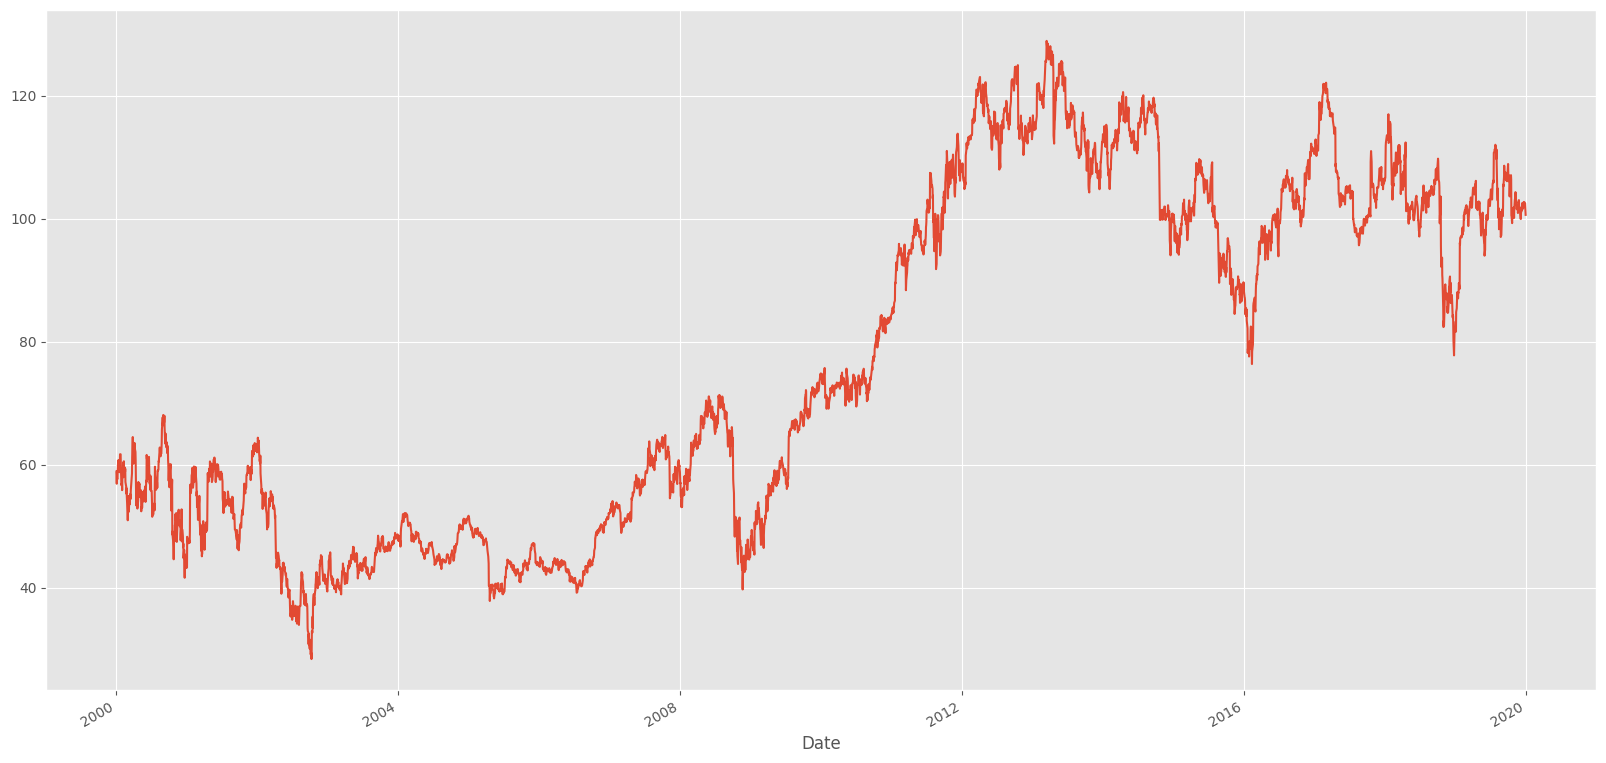

In [144]:
style.use('ggplot')
data['IBM_Close'].plot()
plt.show()


<BarContainer object of 5030 artists>

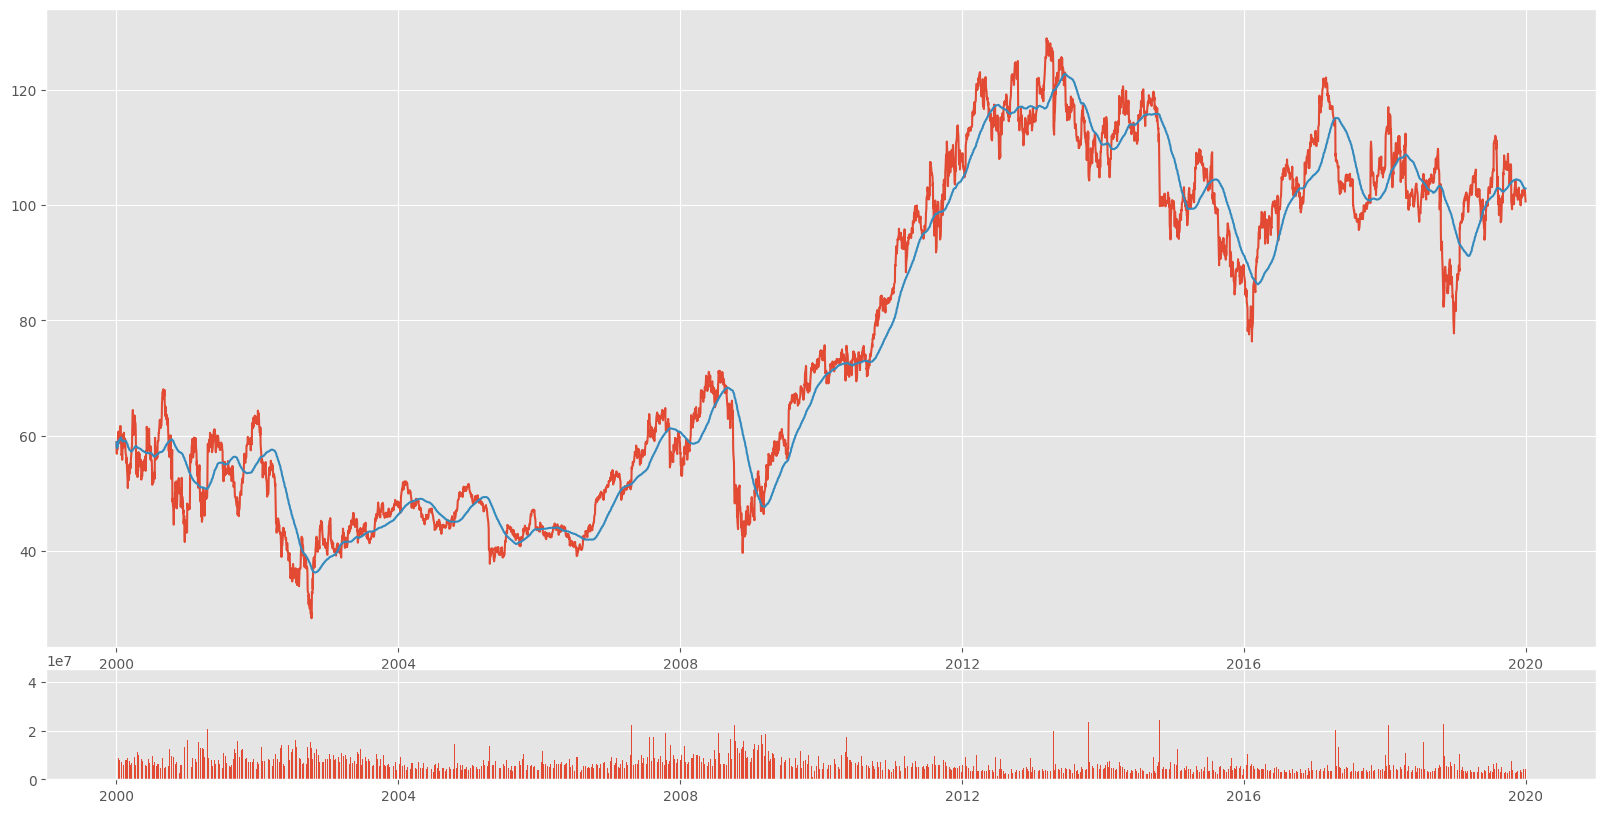

In [145]:
df=data
df_copy=df.copy()
df_copy['100ma'] = df['IBM_Close'].rolling(window=100,min_periods=0).mean()
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df['IBM_Close'])
ax1.plot(df_copy.index,df_copy['100ma'])
ax2.bar(df.index,df['IBM_Volume'])



In [146]:
(df_copy.head())

,IBM_Close,IBM_High,IBM_Low,IBM_Open,IBM_Volume,100ma
Date,,,,,,
2000-01-03,58.897034,58.897034,56.802638,57.088235,10823694,58.897034
2000-01-04,56.897827,58.135427,56.294894,57.881560,8606279,57.897430
2000-01-05,58.897034,60.801035,56.929572,57.342102,13318927,58.230632
2000-01-06,57.881557,60.388487,57.627691,59.912488,8338607,58.143363
2000-01-07,57.627689,59.880752,56.167957,59.531686,12402108,58.040228


In [158]:
df_ohlc=df['IBM_Close'].resample('10D').ohlc()
df_volume=df['IBM_Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
# df_ohlc['Date']=df['Date'].map(mdates.date2num)
print(df_ohlc.head())

        Date       open       high        low      close
0 2000-01-03  58.897034  60.674099  56.897827  60.674099
1 2000-01-13  60.039421  61.689579  58.770088  61.689579
2 2000-01-23  61.689579  61.689579  55.850620  55.850620
3 2000-02-02  57.627689  60.547363  57.627689  58.641350
4 2000-02-12  58.990795  59.530830  57.180088  57.180088


In [159]:
df_ohlc.head()


,Date,open,high,low,close
0,2000-01-03,58.897034,60.674099,56.897827,60.674099
1,2000-01-13,60.039421,61.689579,58.770088,61.689579
2,2000-01-23,61.689579,61.689579,55.850620,55.850620
3,2000-02-02,57.627689,60.547363,57.627689,58.641350
4,2000-02-12,58.990795,59.530830,57.180088,57.180088


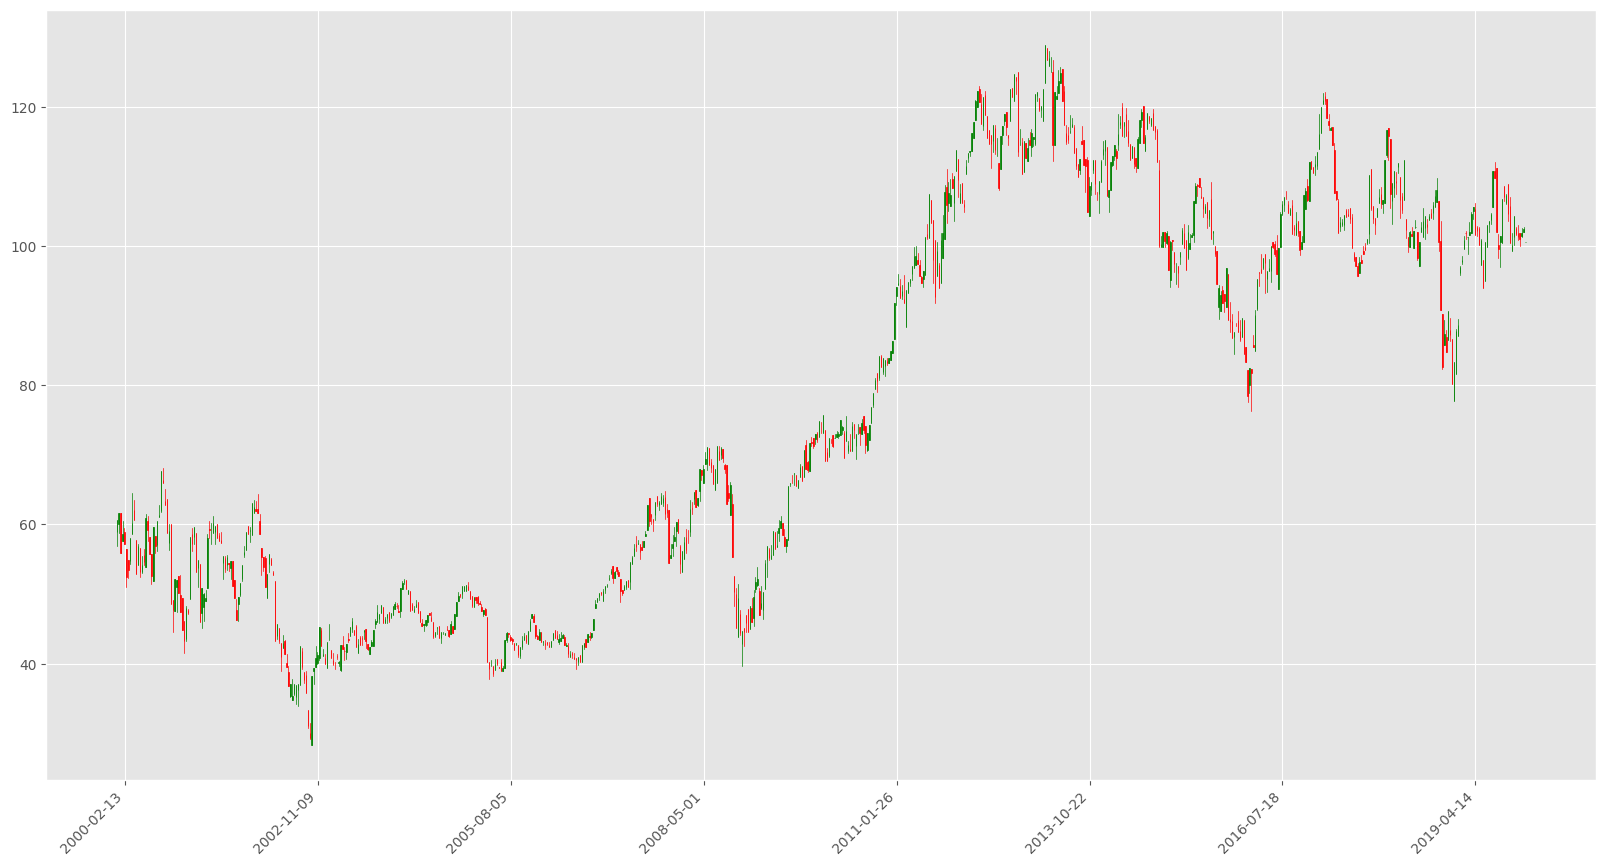

In [160]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker  # Import mticker
import pandas as pd
from mpl_finance import candlestick_ohlc  # Assuming you are using mpl_finance for candlestick plotting

# Assuming df_ohlc is your DataFrame with OHLC data
df_ohlc['Date'] = pd.to_datetime(df_ohlc['Date'])  # Convert the 'Date' column to datetime format
df_ohlc['Date'] = df_ohlc['Date'].apply(mdates.date2num)  # Convert datetime to numerical format

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot candlestick chart
candlestick_ohlc(ax1, df_ohlc[['Date', 'open', 'high', 'low', 'close']].values, width=2, colorup='g')

# Set date formatting for x-axis
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))  # Adjust the number of ticks as needed
ax1.grid(True)

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.show()


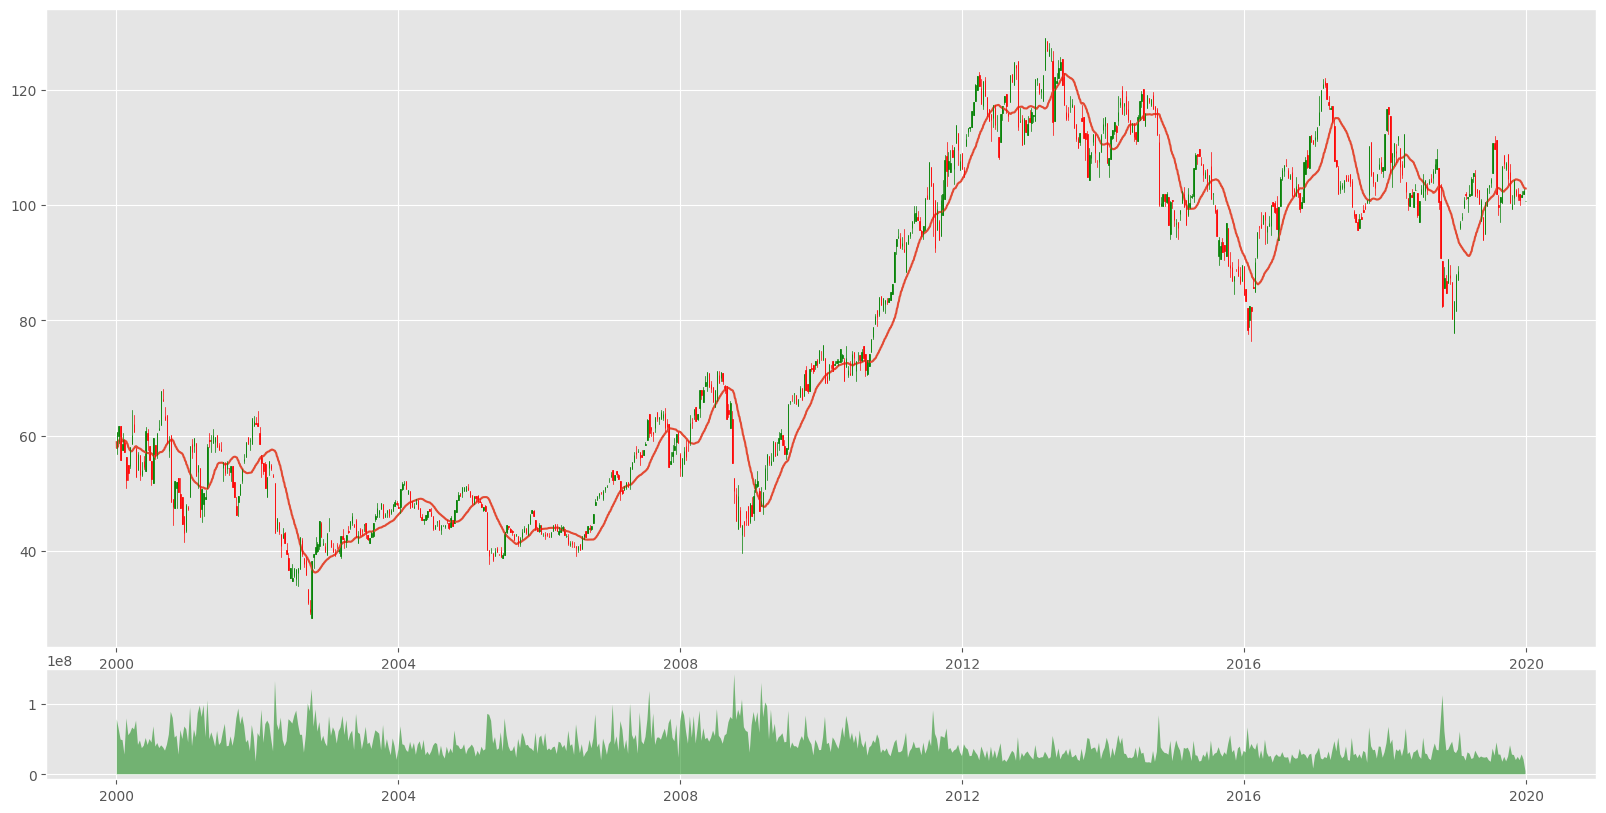

In [161]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
ax1.plot(df_copy.index,df_copy['100ma'])
candlestick_ohlc(ax1, df_ohlc.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0,facecolor='green', alpha=0.5)
plt.show()



In [175]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Sort by date (in case it's not sorted)
df_ohlc = df_ohlc.sort_values(by=['Date'])

# Feature Engineering - Adding moving averages as an example
df_ohlc['MA_5'] = df_ohlc['close'].rolling(window=5).mean()
df_ohlc['MA_20'] = df_ohlc['close'].rolling(window=20).mean()

# Drop rows with NaN values created by rolling
df_ohlc = df_ohlc.dropna()

# Use 'close' as the target variable and other features
features = ['open', 'high', 'low', 'close', 'MA_5', 'MA_20']
target = 'close'

# Normalize the data (scaling the features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_ohlc[features])

# Prepare the dataset for time-series forecasting
def create_dataset(data, target_col, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back, target_col])
    return np.array(X), np.array(y)

# Create the time-series dataset (X and y)
X, y = create_dataset(scaled_data, df_ohlc.columns.get_loc(target))

# Train-Test Split (chronologically)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict the test set
y_pred = model.predict(X_test)

# Invert scaling for predictions and true values
# To invert the scaling, concatenate the features (X_test) with the predictions and true values
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]

# Evaluation
mae = np.mean(np.abs(y_test_rescaled - y_pred_rescaled))
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled)**2))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.1302
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0139
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0052
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0028
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0023
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0021
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0017
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0018
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0016
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0013
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step
Mean Absolute Error: 3.183642732611475
Root Mean Squared Error: 3.9517881440059726


In [179]:
# Save the model with the current company name and in the new format
model.save(f'{company}_model.keras')


In [180]:
model.save(company+'.h5')